In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli, binom, geom, poisson, norm

In [2]:
df_interview_accepts = pd.read_csv("interview_accepts.csv")

In [3]:
df_interview_accepts.head(50)

,date,accept
0,2018-01-01,0
1,2018-01-01,0
2,2018-01-01,0
3,2018-01-01,0
4,2018-01-01,0
5,2018-01-01,0
6,2018-01-01,0
7,2018-01-01,0
8,2018-01-01,0
9,2018-01-01,0


In [4]:
df_interview_accepts.shape

(181155, 2)

In [5]:
df_interview_accepts["accept"].value_counts()

0    163107
1     18048
Name: accept, dtype: int64

# Bernoulli

<AxesSubplot:xlabel='accept', ylabel='Probability'>

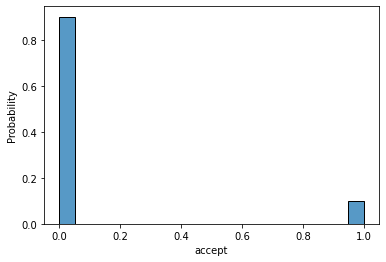

In [6]:
sns.histplot(df_interview_accepts["accept"], stat="probability")

In [7]:
p = 18048/181155
print(p)

0.09962739090833816


<StemContainer object of 3 artists>

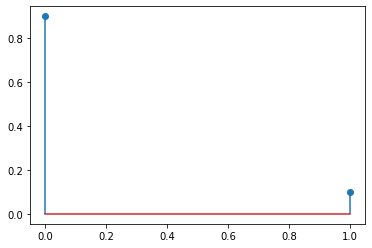

In [8]:
x_values = [0, 1]
y_values = bernoulli(p).pmf(x_values)
plt.stem(x_values, y_values)

# Binomial

<AxesSubplot:ylabel='Count'>

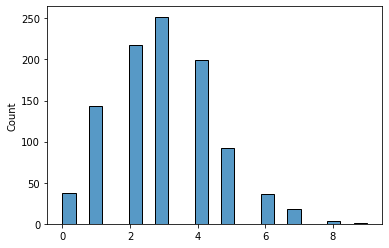

In [9]:
# We randomly choose 30 people. Find number of people accepted
n = 30
counts = np.zeros(n)
values = []
num_trials = 1000
for i in range(num_trials):
    samples = df_interview_accepts.sample(n)
    k = samples["accept"].sum()
    values.append(k)
    counts[k] += 1
counts /= num_trials
# plt.bar(range(n), counts)
sns.histplot(values)

In [10]:
values

[3,
 4,
 1,
 4,
 5,
 3,
 2,
 3,
 4,
 7,
 3,
 1,
 5,
 3,
 2,
 2,
 3,
 1,
 6,
 2,
 6,
 4,
 4,
 3,
 4,
 3,
 2,
 3,
 3,
 3,
 0,
 3,
 3,
 2,
 5,
 1,
 3,
 6,
 3,
 3,
 3,
 2,
 3,
 3,
 0,
 4,
 0,
 4,
 3,
 7,
 6,
 1,
 3,
 3,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 5,
 4,
 1,
 6,
 3,
 1,
 2,
 3,
 1,
 2,
 3,
 5,
 2,
 5,
 1,
 2,
 2,
 2,
 2,
 2,
 4,
 5,
 2,
 2,
 0,
 7,
 3,
 4,
 7,
 2,
 4,
 2,
 2,
 1,
 4,
 5,
 4,
 0,
 2,
 3,
 4,
 2,
 2,
 4,
 3,
 2,
 4,
 2,
 2,
 4,
 3,
 2,
 4,
 0,
 2,
 4,
 1,
 7,
 3,
 1,
 3,
 0,
 4,
 1,
 3,
 4,
 3,
 2,
 2,
 3,
 3,
 0,
 5,
 3,
 7,
 1,
 2,
 1,
 3,
 4,
 2,
 4,
 7,
 4,
 2,
 2,
 2,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 1,
 3,
 3,
 1,
 3,
 4,
 2,
 2,
 3,
 4,
 0,
 3,
 0,
 3,
 4,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 3,
 4,
 1,
 2,
 5,
 1,
 5,
 1,
 3,
 0,
 1,
 3,
 4,
 4,
 5,
 2,
 3,
 5,
 4,
 3,
 3,
 1,
 3,
 1,
 1,
 5,
 1,
 3,
 2,
 3,
 2,
 2,
 2,
 2,
 6,
 2,
 2,
 3,
 1,
 4,
 6,
 4,
 2,
 4,
 2,
 4,
 3,
 2,
 3,
 1,
 2,
 8,
 3,
 6,
 5,
 4,
 3,
 1,
 5,
 3,
 5,
 3,
 3,
 3,
 5,
 4,


<StemContainer object of 3 artists>

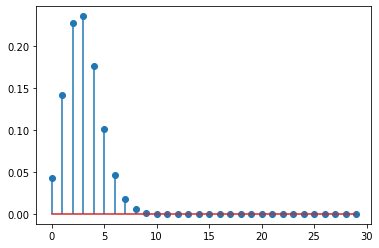

In [11]:
b = binom(n=30, p=p)
x_values = np.arange(0, 30)
y_values = b.pmf(x_values)
plt.stem(x_values, y_values)

In [12]:
dates = df_interview_accepts["date"].unique()
print(len(dates))

1826


<AxesSubplot:ylabel='Count'>

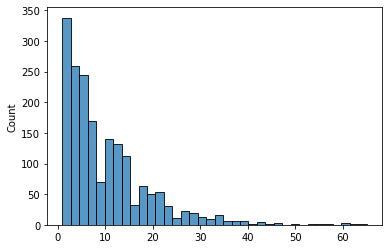

In [13]:
counts = np.zeros(100)
values = []
for date in dates:
    df = df_interview_accepts[df_interview_accepts["date"]==date]
    df.set_index(pd.Index(range(1, len(df)+1)), inplace=True)
    k = df[df["accept"]==1].index[0]
    values.append(k)
    counts[k] += 1
# plt.bar(range(len(counts)), counts)
sns.histplot(values)

In [14]:
df = df_interview_accepts[df_interview_accepts["date"]==dates[8]]

In [15]:
df.head(50)

,date,accept
866,2018-01-09,0
867,2018-01-09,0
868,2018-01-09,0
869,2018-01-09,0
870,2018-01-09,0
871,2018-01-09,0
872,2018-01-09,0
873,2018-01-09,0
874,2018-01-09,0
875,2018-01-09,0


<StemContainer object of 3 artists>

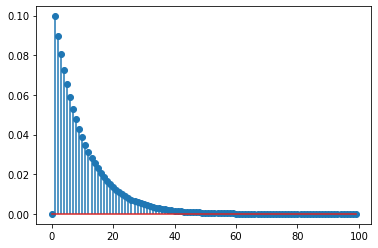

In [16]:
geometric_distribution = geom(p=p)
x_values = np.arange(0, 100)
y_values = geometric_distribution.pmf(x_values)
plt.stem(x_values, y_values)

# Poisson

In [17]:
df_football = pd.read_csv("football.csv")

In [18]:
df_football.shape

(10000, 1)

In [19]:
df_football.head(10)

,score
0,4
1,4
2,3
3,1
4,2
5,3
6,1
7,2
8,4
9,3


In [20]:
df_football.mean()

score    2.511
dtype: float64

<AxesSubplot:ylabel='Count'>

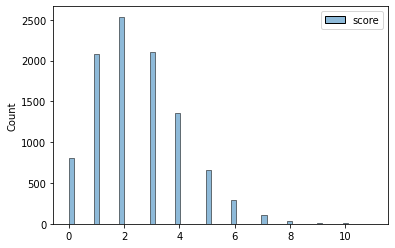

In [21]:
sns.histplot(df_football)

<StemContainer object of 3 artists>

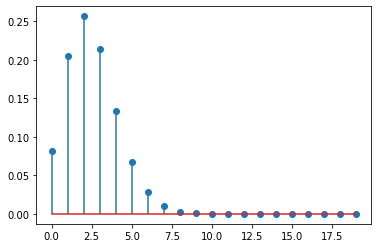

In [22]:
x_values = np.arange(0, 20)
y_values = poisson(2.5).pmf(x_values)
plt.stem(x_values, y_values)

# Log-Normal distribution

In [23]:
df_wt = pd.read_csv("waiting_time.csv")

In [24]:
df_wt.head()

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439


<AxesSubplot:ylabel='Count'>

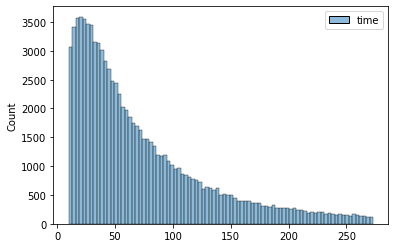

In [25]:
sns.histplot(df_wt)

In [26]:
log_waiting_time = np.log(df_wt)

<AxesSubplot:ylabel='Count'>

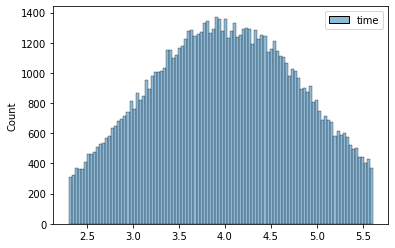

In [27]:
sns.histplot(log_waiting_time, bins=100)

# Height and Weight

In [28]:
df_wh = pd.read_csv("weight-height.csv")

In [29]:
df_wh["Height"].mean()

66.36755975482124

In [30]:
df_wh["Height"].std()

3.8475281207732293

<AxesSubplot:xlabel='Height', ylabel='Count'>

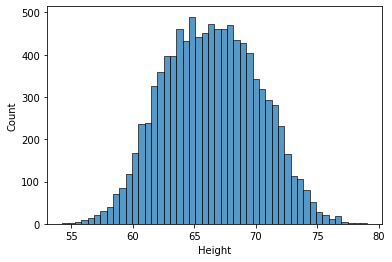

In [31]:
sns.histplot(df_wh["Height"])

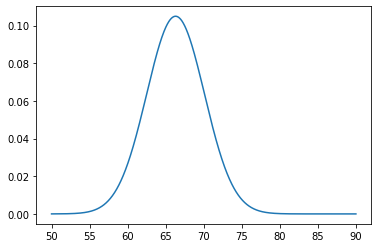

In [32]:
x_values = np.linspace(50, 90, 1000)
y_values = norm(66.3, 3.8).pdf(x_values)
plt.plot(x_values, y_values)

In [33]:
np.random.normal(66.3, 3.8)

67.59976358584031

# Dice

In [34]:
values = np.random.choice([1, 2, 3, 4, 5, 6], size=10000)

In [35]:
values[0:30]

array([5, 5, 6, 3, 3, 6, 4, 5, 2, 6, 3, 4, 3, 4, 1, 5, 2, 6, 6, 4, 6, 6,
       4, 1, 4, 3, 2, 4, 4, 6])

In [36]:
np.mean(values)

3.5001